<a href="https://colab.research.google.com/github/Mayuriluniya/Car_Damaged_Detection_Using_YOLOV5_VGG/blob/main/Car_or_Not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import h5py
import urllib.request
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk
from IPython.display import Image, display, clear_output
from collections import Counter, defaultdict
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.utils.data_utils import get_file
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, History

In [ ]:
CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'

In [ ]:
vgg16 = VGG16(weights='imagenet')
vgg19 = VGG19(weights='imagenet')
resnet = ResNet50(weights='imagenet')
inception = InceptionV3(weights='imagenet')
xception = Xception(weights='imagenet')

91897856/91884032 [==============================] - 1s 0us/step


In [ ]:
def prepare_image_224(img_path):
    img = load_img(img_path, target_size=(224,224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

In [ ]:
def prepare_image_299(img_path):
    img = load_img(img_path, target_size=(299,299))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

In [ ]:
def get_predictions(preds, top=5):
    global CLASS_INDEX
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = get_file('imagenet_class_index.json',CLASS_INDEX_PATH,cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        result.sort(key=lambda x: x[2], reverse=True)
        results.append(result)
    return results

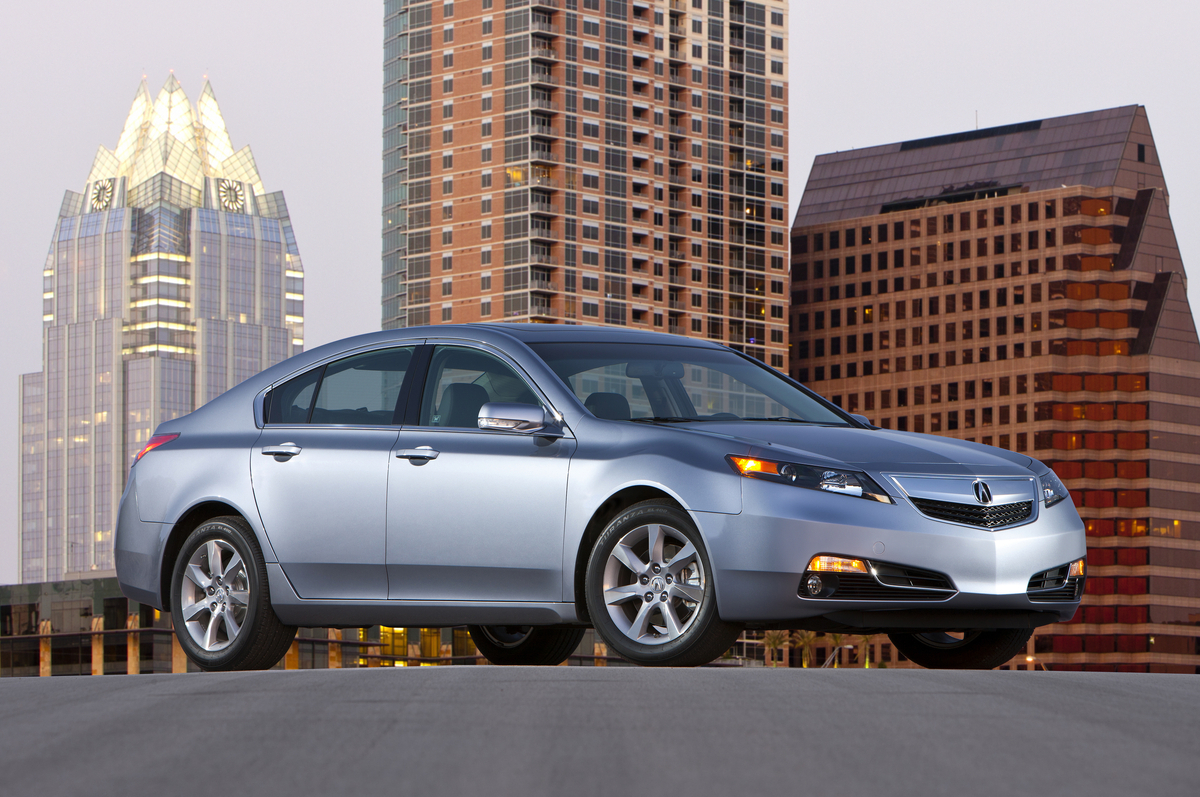

In [ ]:
Image('/content/drive/MyDrive/Datasets/Car_Damage/data1a/validation/01-whole/0002.jpg')

In [ ]:
y = prepare_image_224('/content/drive/MyDrive/Datasets/Car_Damage/data1a/validation/01-whole/0002.jpg')
preds = vgg16.predict(y)
print(get_predictions(preds, top=5))

49152/35363 [=========================================] - 0s 0us/step
[[('n04285008', 'sports_car', 0.3149366), ('n04037443', 'racer', 0.30839574), ('n02930766', 'cab', 0.12456359), ('n02814533', 'beach_wagon', 0.060754932), ('n03670208', 'limousine', 0.049448133)]]


In [ ]:
z = prepare_image_224('/content/drive/MyDrive/Datasets/Car_Damage/data1a/validation/01-whole/0002.jpg')
preds = vgg19.predict(z)
print(get_predictions(preds, top=5))

[[('n04285008', 'sports_car', 0.2652983), ('n04037443', 'racer', 0.24703938), ('n02930766', 'cab', 0.106572405), ('n03770679', 'minivan', 0.0801222), ('n02974003', 'car_wheel', 0.055696324)]]


In [ ]:
a = prepare_image_224('/content/drive/MyDrive/Datasets/Car_Damage/data1a/validation/01-whole/0002.jpg')
preds = resnet.predict(a)
print(get_predictions(preds))

[[('n04285008', 'sports_car', 0.24371727), ('n03100240', 'convertible', 0.21901454), ('n03459775', 'grille', 0.14661081), ('n02930766', 'cab', 0.14171842), ('n02974003', 'car_wheel', 0.049693596)]]


In [ ]:
b = prepare_image_299('/content/drive/MyDrive/Datasets/Car_Damage/data1a/validation/01-whole/0002.jpg')
preds = inception.predict(b)
print(get_predictions(preds, top=5))

[[('n03047690', 'clog', 1.0), ('n02841315', 'binoculars', 2.2501572e-09), ('n03950228', 'pitcher', 2.0983775e-09), ('n04131690', 'saltshaker', 1.0432575e-13), ('n04366367', 'suspension_bridge', 4.5568e-15)]]


In [ ]:
c = prepare_image_299('/content/drive/MyDrive/Datasets/Car_Damage/data1a/validation/01-whole/0002.jpg')
preds = xception.predict(c)
print(get_predictions(preds, top=5))

[[('n03942813', 'ping-pong_ball', 0.9999765), ('n02115641', 'dingo', 1.4645313e-05), ('n02769748', 'backpack', 5.434919e-06), ('n03814906', 'necklace', 2.0318844e-06), ('n03775546', 'mixing_bowl', 7.5144385e-07)]]


In [ ]:
def get_car_categories():
    d = defaultdict(float)
    img_list = os.listdir('/content/drive/MyDrive/Datasets/cars_train')
    for i, img_path in enumerate(img_list):
        img = prepare_image_224('/content/drive/MyDrive/Datasets/cars_train/'+img_path)
        out = vgg16.predict(img)
        preds = get_predictions(out,top=5)
        for pred in preds[0]:
            d[pred[0:2]]+=pred[2]
        if(i%50==0):
            print(i,'/',len(img_list),'complete')
    return Counter(d)

In [ ]:
categ_count = get_car_categories()

0 / 5905 complete
50 / 5905 complete
100 / 5905 complete
150 / 5905 complete
200 / 5905 complete
250 / 5905 complete
300 / 5905 complete
350 / 5905 complete
400 / 5905 complete
450 / 5905 complete
500 / 5905 complete
550 / 5905 complete
600 / 5905 complete
650 / 5905 complete
700 / 5905 complete
750 / 5905 complete
800 / 5905 complete
850 / 5905 complete
900 / 5905 complete
950 / 5905 complete
1000 / 5905 complete
1050 / 5905 complete
1100 / 5905 complete
1150 / 5905 complete
1200 / 5905 complete
1250 / 5905 complete
1300 / 5905 complete
1350 / 5905 complete
1400 / 5905 complete
1450 / 5905 complete
1500 / 5905 complete
1550 / 5905 complete
1600 / 5905 complete
1650 / 5905 complete
1700 / 5905 complete
1750 / 5905 complete
1800 / 5905 complete
1850 / 5905 complete
1900 / 5905 complete
1950 / 5905 complete
2000 / 5905 complete
2050 / 5905 complete
2100 / 5905 complete
2150 / 5905 complete
2200 / 5905 complete
2250 / 5905 complete
2300 / 5905 complete
2350 / 5905 complete
2400 / 5905 com

In [ ]:
with open('vgg16_cat_list.pk', 'wb') as f:
    pk.dump(categ_count, f, -1)

In [ ]:
with open('vgg16_cat_list.pk', 'rb') as f:
    categ_count = pk.load(f)

In [ ]:
categ_list = [k for k, v in categ_count.most_common()[:50]]

In [ ]:
def get_car_categories(categ_list):
    img_list = os.listdir('/content/drive/MyDrive/Datasets/cars_train')
    n = 0
    bad_list = []
    for i, img_path in enumerate(img_list):
        img = prepare_image_224('/content/drive/MyDrive/Datasets/cars_train/'+img_path)
        out = vgg16.predict(img)
        preds = get_predictions(out, top=5)
        for pred in preds[0]:
            if pred[0:2] in categ_list:
                n+=1
                break
            else:
                pass
            bad_list.append(img_path)
        if i%100 == 0:
            print(i,'/',len(img_list), 'complete')
    bad_list = [k for k, v in Counter(bad_list).items() if v == 5]
    return n, bad_list

In [ ]:
num, bad_list = get_car_categories(categ_list)

0 / 5905 complete
100 / 5905 complete
200 / 5905 complete
300 / 5905 complete
400 / 5905 complete
500 / 5905 complete
600 / 5905 complete
700 / 5905 complete
800 / 5905 complete
900 / 5905 complete
1000 / 5905 complete
1100 / 5905 complete
1200 / 5905 complete
1300 / 5905 complete
1400 / 5905 complete
1500 / 5905 complete
1600 / 5905 complete
1700 / 5905 complete
1800 / 5905 complete
1900 / 5905 complete
2000 / 5905 complete
2100 / 5905 complete
2200 / 5905 complete
2300 / 5905 complete
2400 / 5905 complete
2500 / 5905 complete
2600 / 5905 complete
2700 / 5905 complete
2800 / 5905 complete
2900 / 5905 complete
3000 / 5905 complete
3100 / 5905 complete
3200 / 5905 complete
3300 / 5905 complete
3400 / 5905 complete
3500 / 5905 complete
3600 / 5905 complete
3700 / 5905 complete
3800 / 5905 complete
3900 / 5905 complete
4000 / 5905 complete
4100 / 5905 complete
4200 / 5905 complete
4300 / 5905 complete
4400 / 5905 complete
4500 / 5905 complete
4600 / 5905 complete
4700 / 5905 complete
4800

In [ ]:
def pipe1(img_path, categ_list):
    urllib.request.urlretrieve(img_path, 'image.jpg')
    img = prepare_image_224('image.jpg')
    out = vgg16.predict(img)
    preds = get_predictions(out, top=5)
    print("Ensuring entered picture is a car...")
    for pred in preds[0]:
        if pred[0:2] in categ_list:
            print(pred[0:2])
            return "Successful. Proceeding to damage assessment..."
    return "The entered image is a not a car. Please try again. Consider a different angle or lighting."

In [ ]:
pipe1('https://www.autoauctionmall.com/learning-center/contents/uploads/2015/10/damaged-car.jpg', categ_list)

HTTPError: ignored

In [ ]:
pipe1('https://cdn.nba.net/nba-drupal-prod/2017-05/lonzo-ball-sideline-iso.jpg',categ_list)

HTTPError: ignored

In [ ]:
pipe1('https://tse4.mm.bing.net/th?id=OIP.FaZela57De0uzfVxVY3JJQHaEo&pid=Api&P=0&w=289&h=181', categ_list)

Ensuring entered picture is a car...
('n04037443', 'racer')


'Successful. Proceeding to damage assessment...'